# Module 4 Probability Practical for Shannon and Joelle

### Q0: Sampling and Distribution

You are studying the population of a specific type of marine algae in different locations. Assume the algal density is normally distributed. You take samples from two locations (Location A and Location B) to compare the algae populations. Generate synthetic data to represent the algal density (individuals per square meter) at these two locations. Assume a mean density of 200 and 220 individuals/m^2 with a common standard deviation of 20 individuals/m^2 for both locations, with 50 samples from each location.


In [25]:
# Naming the first vector for algae population from location A 
# rnorm notation - 50 samples, with a mean value of 200, and standard deviation of 20 
location_A <- rnorm(50, 200, 20)

# Naming the second vector for algae populations from location B
# rnorm notation - 50 samples, with a mean value of 220 and standard deviation of 20 
location_B <- rnorm(50, 220, 20)

# Printing the random data
location_A
location_B

[1] 162.5815 167.7485 183.0977 174.7915 191.8595 223.2822 212.9310 157.2241
 [9] 121.0772 197.8554 206.6808 173.4830 217.0599 213.0627 199.3907 222.0432
[17] 165.3856 213.5785 224.8276 174.8584 221.4670 172.0921 203.9862 241.1892
[25] 189.7868 193.2337 172.4694 217.6699 181.9752 196.0980 169.9956 237.8153
[33] 185.0299 231.7937 214.8084 212.5953 221.6012 166.8628 191.3933 227.2174
[41] 193.5150 181.4596 183.8845 199.9147 202.2037 205.5578 192.3869 210.3672
[49] 169.2922 211.1292

[1] 210.2132 226.8061 235.3488 213.4572 269.7915 246.4458 231.1912 192.1028
 [9] 245.6193 236.1137 261.6447 213.9025 258.8800 213.9932 238.5868 220.3806
[17] 248.8500 237.4394 235.4245 217.9995 226.2576 213.1898 244.8029 220.1405
[25] 251.4309 208.4298 226.4658 232.0866 221.6379 217.6124 211.5661 193.9941
[33] 214.3393 211.4799 157.8721 222.5841 205.0726 233.0434 246.9118 226.6988
[41] 205.2045 174.4177 249.9632 225.6841 214.2213 196.9287 184.1543 227.9476
[49] 199.3819 246.9038

In [4]:
# Better to only show a few data points instead of these crazy big rows

location_A[0:5]
location_B[0:5]

[1] 229.3401 129.6010 190.8935 198.2249 209.6506

[1] 231.6997 206.9179 209.5682 187.0354 256.6852

### Q1: Data Cleaning

Check your dataset for any outliers. 

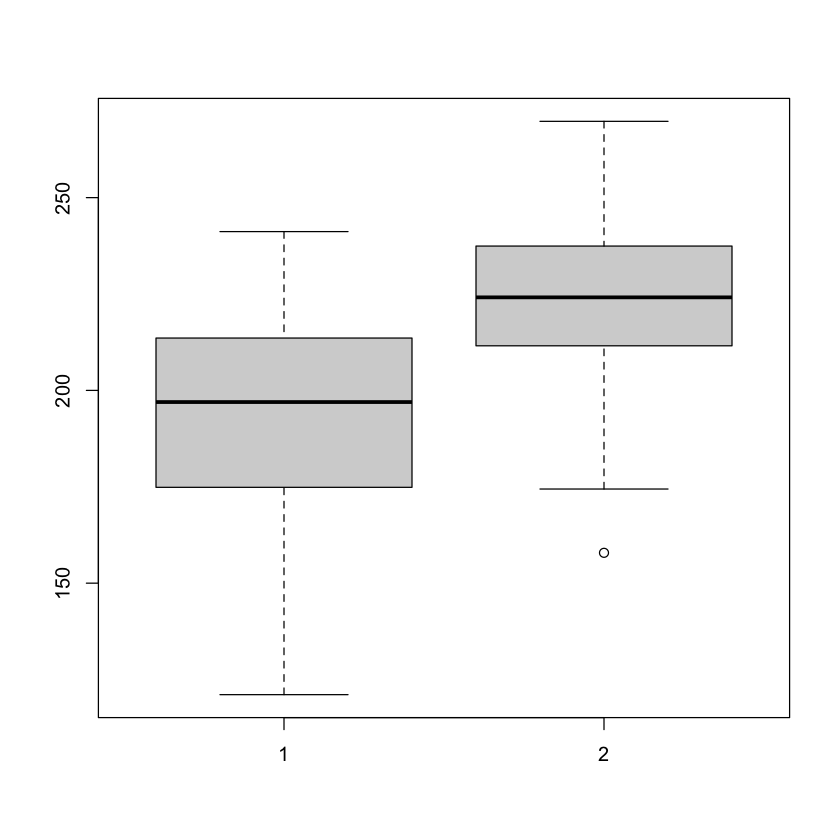

In [83]:
# outlier: an event that has very low probability
# non-parametric: there are no assumptions of the data distribution or parameters 

boxplot(location_A, location_B)

In [20]:
# Another answer
# all data should be within +/- 3 sd of the deviations
lower_bound_A <- mean(location_A) - 3 * sd(location_A)
lower_bound_A

upper_bound_A <- mean(location_A) + 3 * sd(location_A)
upper_bound_A

[1] 1

[1] 1

In [26]:
# Created a dataframe for plotting and viewed the first 6 columns. 
df <- data.frame(location_A, location_B)
head(df)

,location_A,location_B
,<dbl>,<dbl>
1,162.5815,210.2132
2,167.7485,226.8061
3,183.0977,235.3488
4,174.7915,213.4572
5,191.8595,269.7915
6,223.2822,246.4458


In [22]:
library(ggplot2)

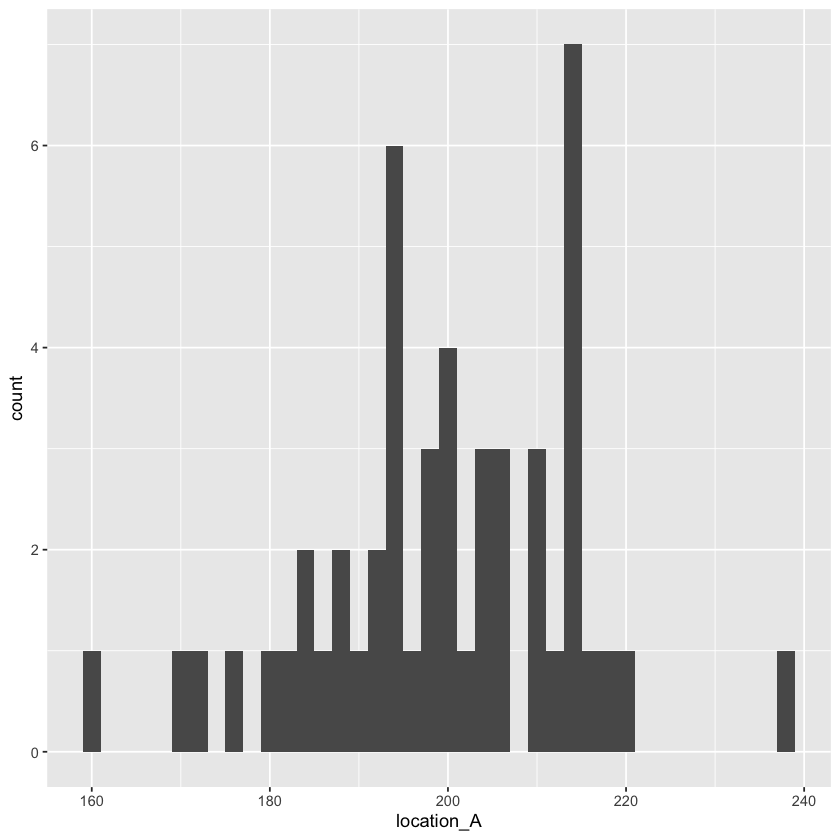

In [5]:
# Plotting a histogram of location A to see the frequency of values and determine outliers. 
ggplot(data = df, aes(x = location_A)) + 
    geom_histogram(binwidth=2)

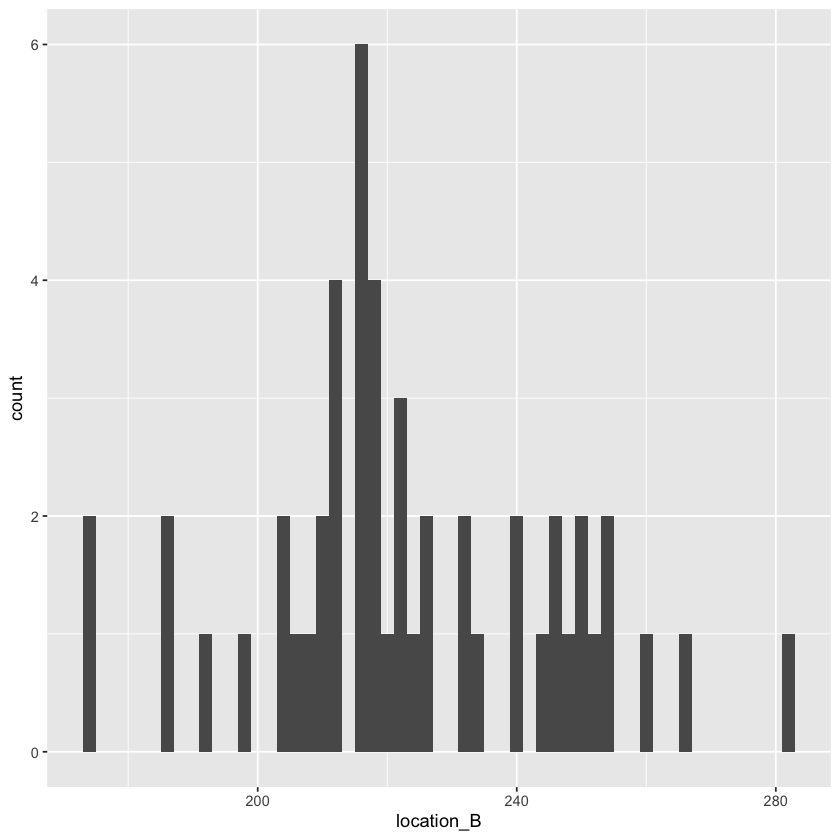

In [6]:
# Plotting a histogram of location B to see the frequency of values and determine outliers. 
ggplot(data = df, aes(x = location_B)) + 
    geom_histogram(binwidth=2) 

There are quite a few outliers. I can tell from the histogram frequency for location A and B. 

* Since the mean for location A is 200 with SD of 20
    - anything below 180 and anything above 220 is an outlier. 
* Similarly, the mean for location B is 220 with SD of 20,
    - anything below 200 and above 240 is an outlier

In [7]:
# Another way to check for outliers
summary(df)

   location_A      location_B   
 Min.   :159.0   Min.   :173.3  
 1st Qu.:191.2   1st Qu.:211.7  
 Median :200.3   Median :218.0  
 Mean   :199.3   Mean   :223.1  
 3rd Qu.:210.7   3rd Qu.:240.6  
 Max.   :237.4   Max.   :281.8  

### Q2: Visualization and Kernel Density Estimation (KDE)

Plot a Kernel Density Estimation (geom_density plot) to visualize the distribution of algal densities at both locations. 



In [27]:
sites <- c("location_A", "location_B")
samples <- c(location_A, location_B)

location_algae <- data.frame(sites, samples)
head(location_algae)

,sites,samples
,<chr>,<dbl>
1,location_A,162.5815
2,location_B,167.7485
3,location_A,183.0977
4,location_B,174.7915
5,location_A,191.8595
6,location_B,223.2822


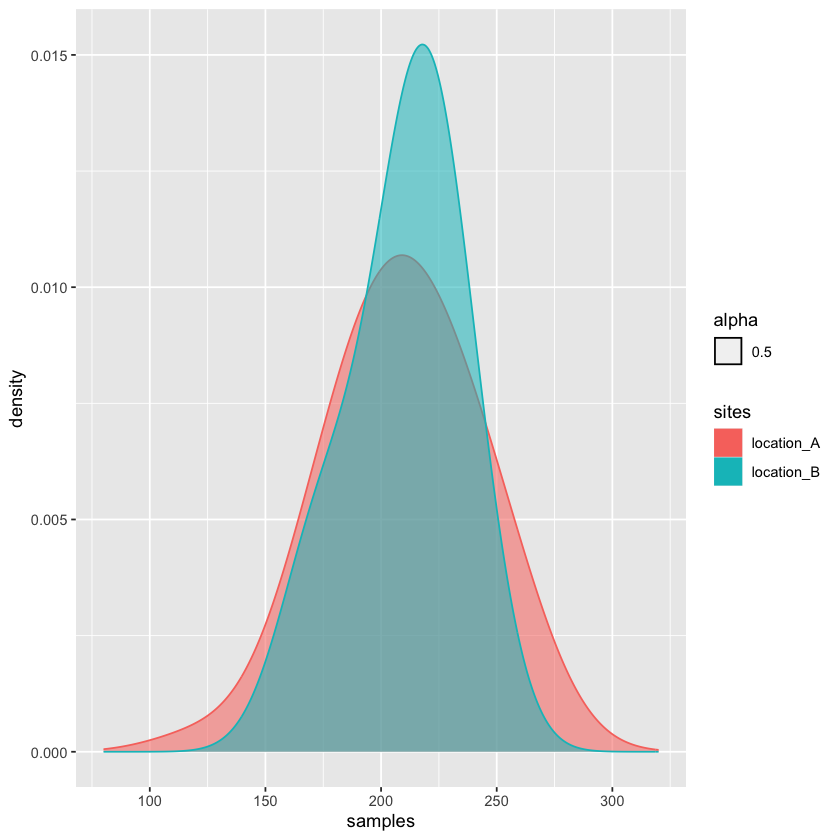

In [93]:
ggplot(data = location_algae, aes(x = samples, color = sites)) + 
    geom_density(aes(fill = sites, alpha = 0.5), adjust = 1.7) +
    xlim(80,320) 

### Q3: Binomial Distribution
Suppose in a new survey, at each location, you take 10 random samples and in each sample, you identify whether a particular species of marine algae is present or not. Assume the probability of finding this species in a sample is 0.7 at Location A and 0.5 at Location B.

Simulate this scenario using a binomial distribution, and compare the probability of finding the species in at least 7 out of 10 samples at both locations.

In [57]:
# Redefining new vectors for binomial distribution, where our x = 7, sample size = 10, and probability is 0.7 & 0.5
location_A_binom <- dbinom(7, 10, 0.7)
location_B_binom <- dbinom(7, 10, 0.5)

location_A_binom
location_B_binom

[1] 0.2668279

[1] 0.1171875

In [87]:
# Another way:
# seed = replication of this random value, where you can start with a value but the chain of iterations will be different 
set.seed(42)
n <- 10 
probability_A <- 0.7
probability_B <- 0.5
sample_A_simulation <- rbinom(10, size = 1, prob = probability_A)
sample_A_simulation

sample_B_simulation <- rbinom(10, size = 1, prob = probability_B)
sample_B_simulation 

[1] 0 0 1 0 1 1 0 1 1 0

[1] 0 1 1 0 0 1 1 0 0 1

### Q4: Poisson Distribution
Imagine a scenario where you are studying the occurrences of a particular rare marine event, such as the sighting of a rare marine species, over a set period at a specified location. Assume the average rate of occurrence is 3 per month.

Utilize a Poisson distribution to calculate the probability of observing exactly 5 occurrences in a month, and the probability of observing 3 or fewer occurrences in a month.

In [58]:
#Use dpois for possion distributions where x= The number of events you want to find the probability for and 
# lamda = The mean rate of events occurring in the given interval

location_poisson_5 <- dpois(5,3)
location_poisson_5

[1] 0.1008188

In [59]:
# Now we want to use ppois to calculate the cumulative distribution function of the poisson distirbution and the 
# lower.tail calculates the probability less than or equal to 1 
location_poisson_3 <- ppois(3,3, lower.tail = TRUE)
location_poisson_3 

[1] 0.6472319

### Q5: consider the following two lists. 

In [60]:
list1 <- c(44.40, 47.70, 65.59, 50.71, 51.29, 67.15, 54.61, 37.35, 43.13, 45.54, 62.24, 53.60, 54.01, 51.11, 
           44.44, 67.87, 54.98, 30.33, 57.01, 45.27, 39.32, 47.82, 39.74, 42.71, 43.75, 33.13, 58.38, 51.53, 
           38.62, 62.54, 54.26, 47.05, 58.95, 58.78, 58.22, 56.89, 55.54, 49.38, 46.94, 46.20, 43.05, 47.92, 
           37.35, 71.69, 62.08, 38.77, 45.97, 45.33, 57.80, 49.17, 52.53, 49.71, 49.57, 63.69, 47.74, 65.16, 
           34.51, 55.85, 51.24, 52.16, 53.80, 44.98, 46.67, 39.81, 39.28, 53.04, 54.48, 50.53, 59.22, 70.50, 
           45.09, 26.91, 60.06, 42.91, 43.12, 60.26, 47.15, 37.79, 51.81, 48.61, 50.06, 53.85, 46.29, 56.44, 
           47.80, 53.32, 60.97, 54.35, 46.74, 61.49, 59.94, 55.48, 52.39, 43.72, 63.61, 44.00, 71.87, 65.33, 
           47.64, 39.74)

list2 <- c(44.34, 48.85, 41.30, 39.79, 30.73, 44.32, 33.23, 19.98, 39.30, 58.78, 36.37, 54.12, 20.73, 44.17, 
           52.79, 49.52, 46.59, 35.39, 32.25, 29.64, 46.76, 30.79, 37.64, 41.16, 72.66, 35.22, 48.53, 46.17, 
           30.57, 43.93, 66.67, 51.77, 45.62, 38.66, 14.20, 61.97, 23.09, 56.10, 73.64, 23.34, 55.53, 41.07, 
           21.42, 22.28, 20.98, 37.04, 23.07, 55.32, 76.50, 25.69, 56.82, 56.54, 49.98, 29.87, 43.21, 40.79, 
           53.44, 39.41, 59.65, 39.38, 60.79, 29.26, 26.10, 93.62, 38.75, 49.47, 54.55, 37.74, 52.75, 50.53, 
           41.77, 45.98, 44.49, 76.93, 33.88, 28.56, 45.57, 49.66, 51.55, 38.12, 29.05, 63.95, 39.76, 32.02, 
           41.46, 42.04, 61.65, 46.27, 56.31, 37.51, 48.22, 40.13, 46.42, 31.57, 25.34, 74.96, 54.01, 26.23, 
           35.83, 27.22)


These list were generated using the following code

set.seed(123) (Setting a seed for reproducibility)

list1 <- round(rnorm(100, mean = 50, sd = 10), 2)  # Generating 100 values from a normal distribution

list2 <- round(rnorm(100, mean = 45, sd = 15), 2)  # Generating 100 values from another normal distribution

Compare the distributions of these two lists to determine if they originate from the same distribution or from different distributions.

1. Use geom_density to create a density plot for each list on the same graph. Use different colors to distinguish between the two lists:

In [61]:
# create a data frame of the two lists 
sites <- c("list1", "list2")
samples <- c(list1, list2)

df_lists <- data.frame(sites, samples)
head(df_lists)

,sites,samples
,<chr>,<dbl>
1,list1,44.40
2,list2,47.70
3,list1,65.59
4,list2,50.71
5,list1,51.29
6,list2,67.15


Examine the plot you have generated. Do you think list1 and list2 come from the same distribution or different distributions? Why?
Write down your observations and reasoning.

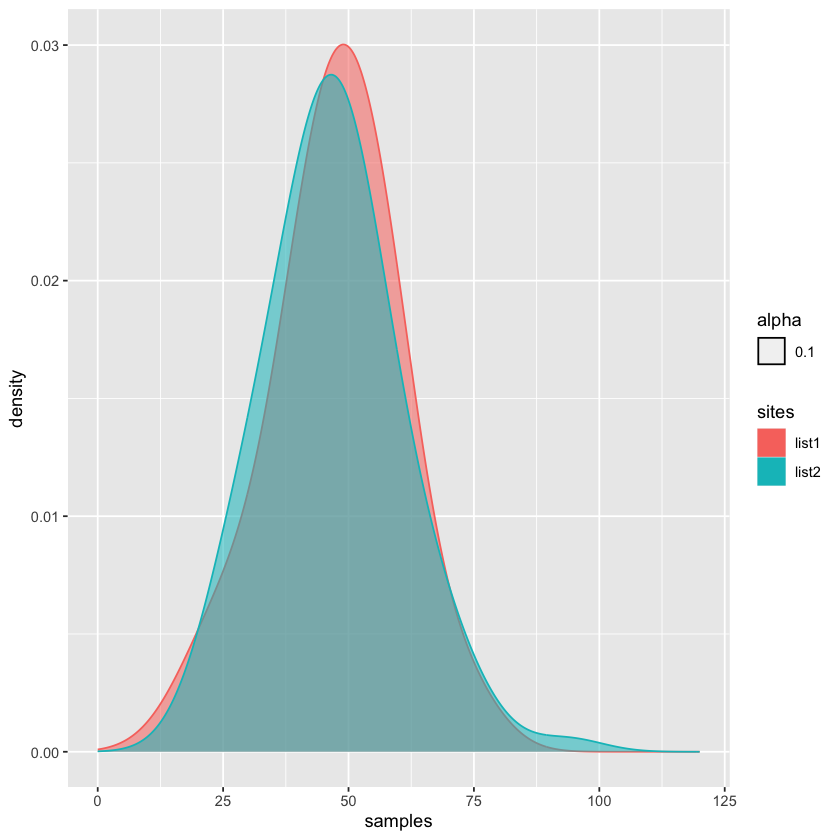

In [99]:
# Plotting the two lists from the data frame 
ggplot(data = df_lists, aes(x = samples, color = sites)) + 
    geom_density(aes(fill = sites, alpha = 0.1), adjust = 1.7) +
    xlim(0,120) 

Yes, I believe the two lists came from the same data frame because they have very similar mean values and standard deviation. This demonstrates some variability in the sampling or specific data points, but the trends in data are overlapping. 